### Inputs

In [1]:
from CSIKit.filters.passband import lowpass
from CSIKit.filters.statistical import running_mean
from CSIKit.util.filters import hampel

from CSIKit.reader import get_reader
from CSIKit.tools.batch_graph import *
from CSIKit.tools.convert_csv import *
from CSIKit.util import csitools

import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import pandas as pd

### Converting to csv functions

In [2]:
def convert_pcap_to_csv(directory, inp, out):
    infile = "csi_tests/" + directory + "/pcap/" + inp
    outfile = "csi_tests/" + directory + "/csv/" + out
    generate_csv(infile, outfile, "amplitude")
def convert_pcap_to_csv1(inp):
    infile = "csi_tests_pcap/" + inp
    inp = inp.replace("pcap","csv")
    outfile = "csi_tests_csv/" + inp
    generate_csv(infile, outfile, "amplitude")

### One heatmap plot function

In [3]:
def plot1(inp):
    data = inp
    my_reader = get_reader(data)
    csi_data = my_reader.read_file(data, scaled=True)
    csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")

    bg = BatchGraph(data)
    bg.heatmap()

### File lists

In [4]:
onlyfiles_pcap = ["csi_tests_pcap/" + f for f in listdir('csi_tests_pcap')
 if isfile(join('csi_tests_pcap', f))]
onlyfiles_csv = ["csi_tests_csv/" + f for f in listdir('csi_tests_csv')
 if isfile(join('csi_tests_csv', f))]

### List of csv file dataframes

In [5]:
lst = []
l = {x for x in range(257)} 

for filename in onlyfiles_csv:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = np.arange(0,len(df.columns))
    lst.append(df)
lst[4]

0          1          2          3          4          5    \
0    12.304489  50.107832  15.051500  23.053514  29.542425  28.129134   
1    30.965624  50.107832  58.460710  57.737930  57.156324  56.764467   
2    33.132343  50.107832  58.327803  57.671930  57.119497  56.872596   
3    21.731863  50.107832  58.297931  57.679865  57.012026  56.709598   
4    18.325089  50.107832  24.742163  27.160033  22.148438  17.242759   
..         ...        ...        ...        ...        ...        ...   
110  42.290672  50.107832  59.561684  59.323692  59.003333  58.821612   
111  15.314789  50.107832  22.552725  24.297523  15.314789  24.842998   
112       -inf       -inf       -inf       -inf       -inf       -inf   
113       -inf       -inf       -inf       -inf       -inf       -inf   
114       -inf       -inf       -inf       -inf       -inf       -inf   

           6          7          8          9    ...        246        247  \
0    57.843162  56.418834  54.282531  51.771208  ...  55.741760  54.334450   
1    56.290679  55.391891  53.778961  51.411643  ...  56.792752  56.764970   
2    56.551577  56.127839  54.933367  52.760940  ...  56.738141  56.788142   
3    56.557462  55.941549  54.531256  52.231038  ...  57.070973  57.138743   
4    60.403511  59.415134  57.481299  54.515838  ...  58.694693  56.401076   
..         ...        ...        ...        ...  ...        ...        ...   
110  58.656688  58.289845  57.268714  55.294624  ...  58.822057  58.758209   
111  59.689917  58.595376  57.062756  54.663812  ...  57.874867  56.135427   
112       -inf       -inf       -inf       -inf  ...       -inf       -inf   
113       -inf       -inf       -inf       -inf  ...       -inf       -inf   
114       -inf       -inf       -inf       -inf  ...       -inf       -inf   

           248        249        250        251        252        253  \
0    51.216911  46.952364  39.920230  12.304489  24.712917  24.345689   
1    56.299282  54.593819  51.837964  48.455011  49.869732  53.952303   
2    56.102267  54.538349  51.577257  48.170362  50.387473  54.085469   
3    56.251364  54.573141  51.743099  48.255884  50.184716  54.119646   
4    54.067888  49.846758  42.082532  29.585639  22.504200  27.551123   
..         ...        ...        ...        ...        ...        ...   
110  57.898182  56.242821  53.583099  51.243640  52.583211  55.448726   
111  53.854293  48.886287  38.193465  24.345689  31.798389  24.969296   
112       -inf       -inf       -inf       -inf       -inf       -inf   
113       -inf       -inf       -inf       -inf       -inf       -inf   
114       -inf       -inf       -inf       -inf       -inf       -inf   

           254        255  
0    14.149733  19.294189  
1    56.497436  21.958997  
2    56.455362  19.294189  
3    56.576562  27.874605  
4    24.842998  18.129134  
..         ...        ...  
110  57.479289  29.268567  
111  12.552725  22.504200  
112       -inf       -inf  
113       -inf       -inf  
114       -inf       -inf  

[115 rows x 256 columns]

### Plot all heatmaps

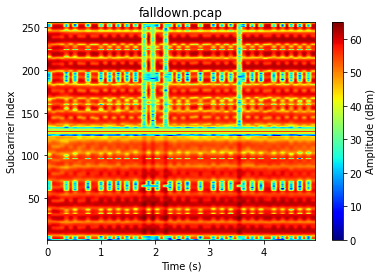

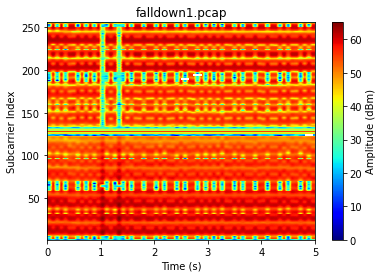

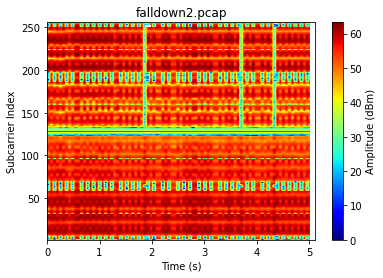

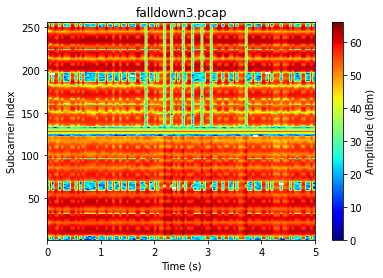

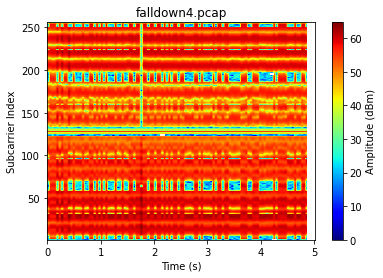

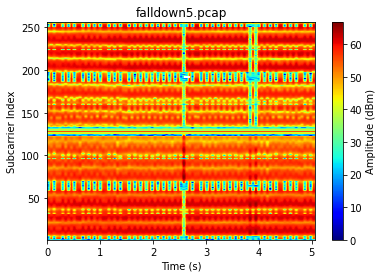

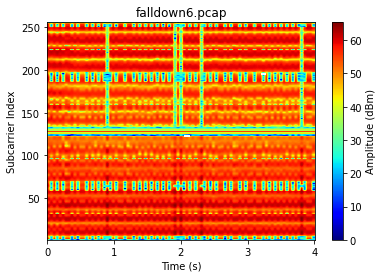

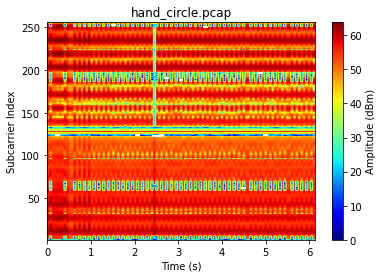

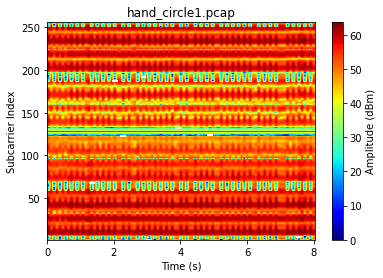

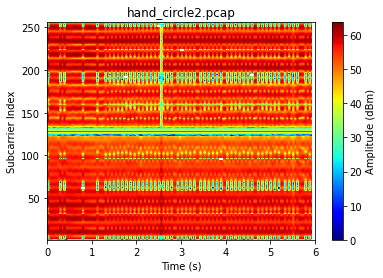

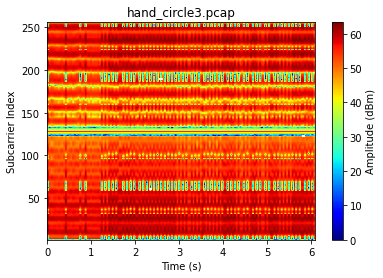

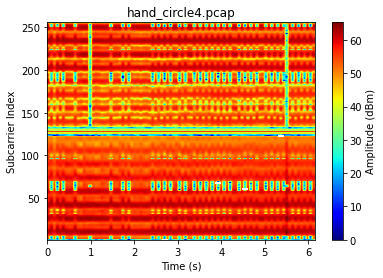

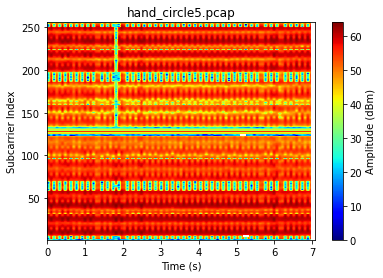

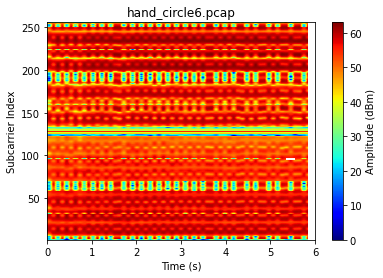

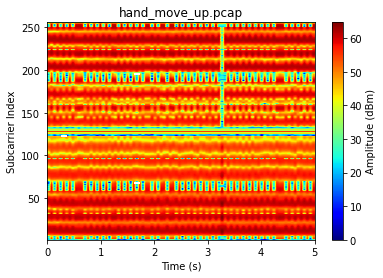

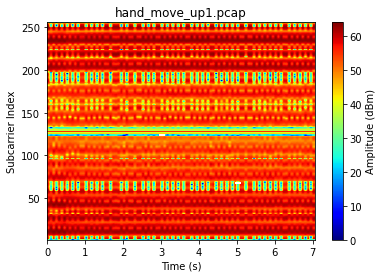

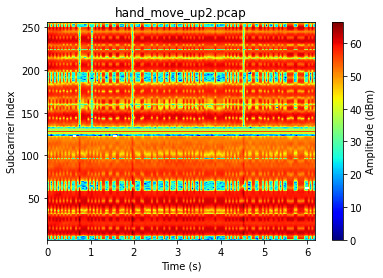

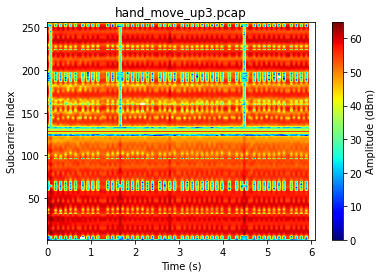

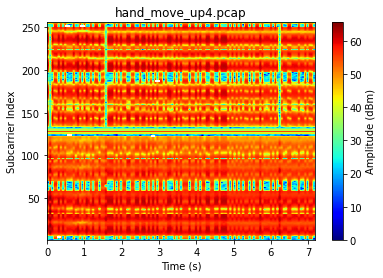

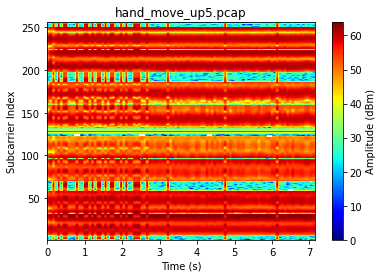

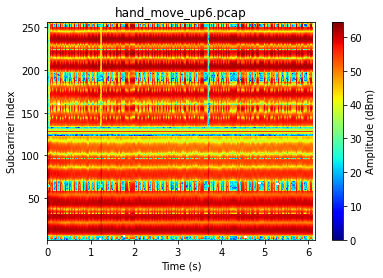

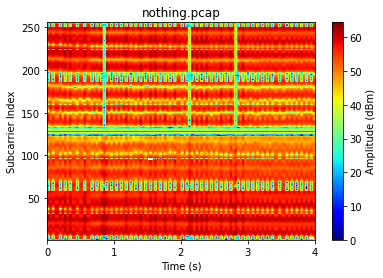

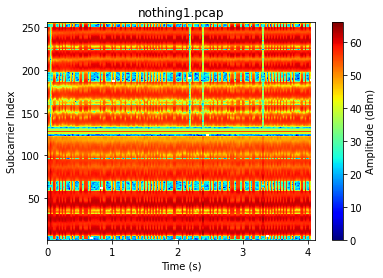

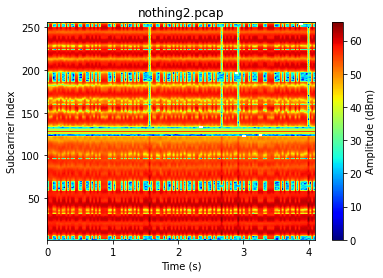

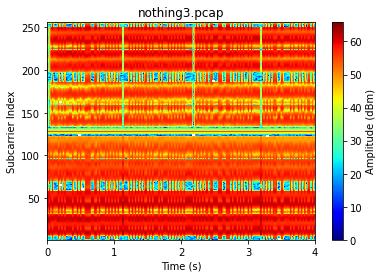

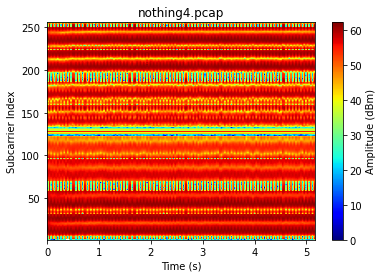

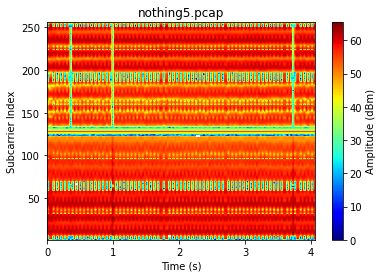

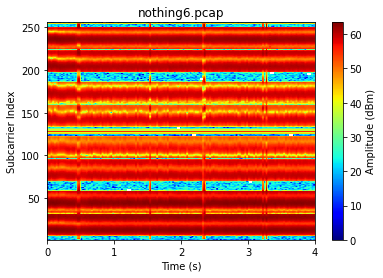

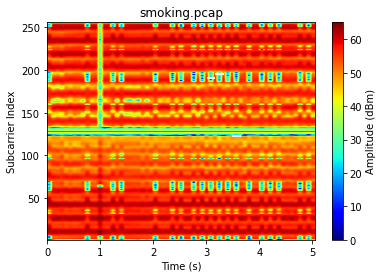

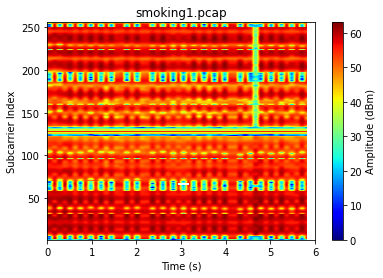

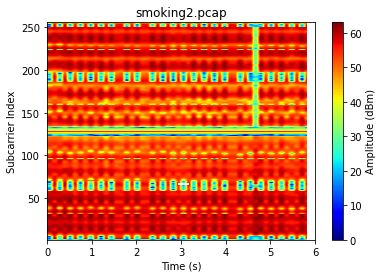

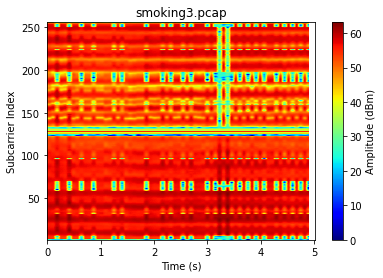

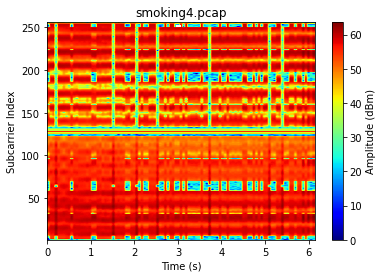

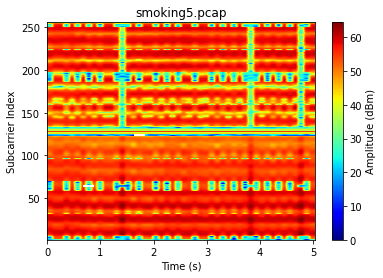

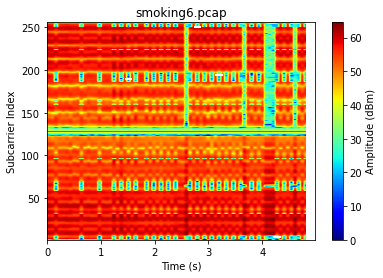

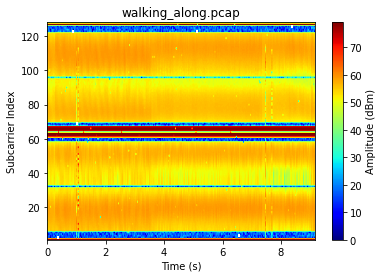

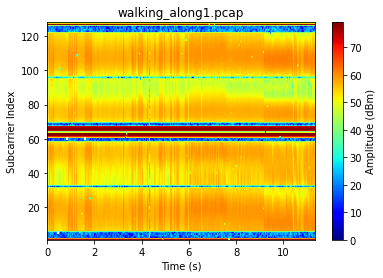

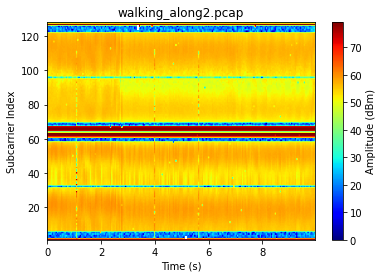

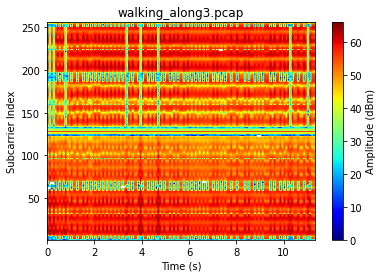

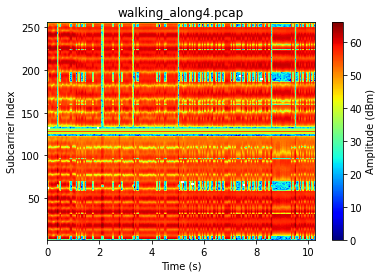

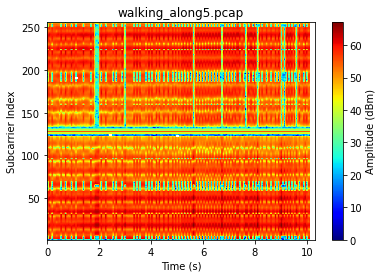

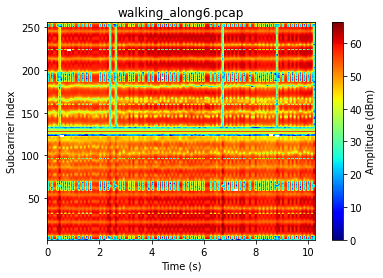

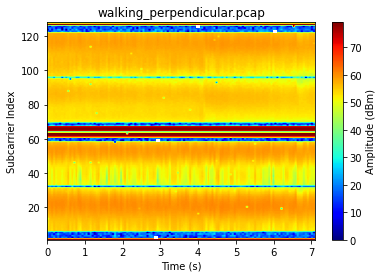

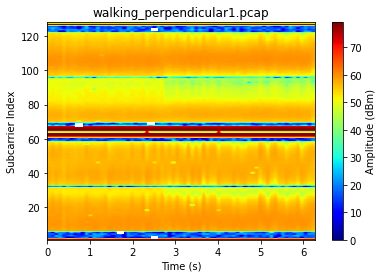

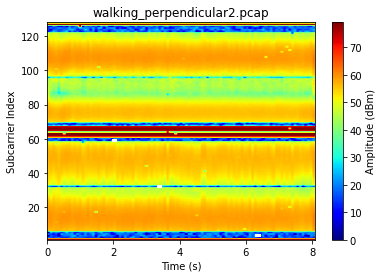

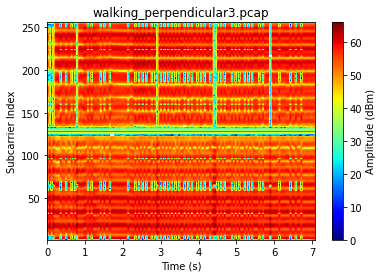

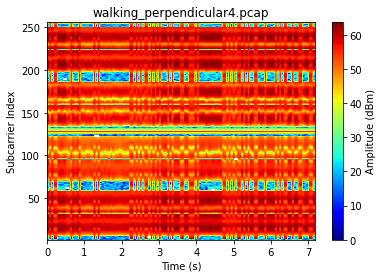

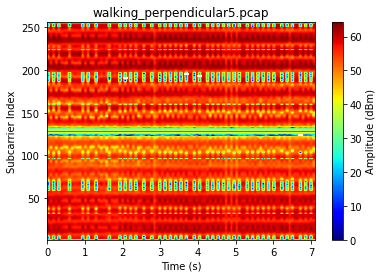

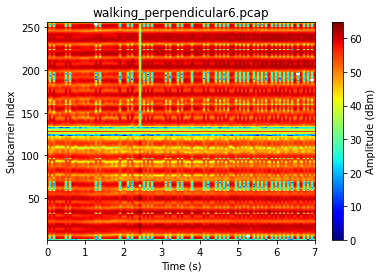

In [6]:
def plot_many():
    for i in onlyfiles_pcap:
        plot1(i)
plot_many()

### All csv's in one dataframe

In [7]:
df = pd.concat(map(pd.read_csv, onlyfiles_csv))
df

Sub 0 RXTX 0/0  Sub 1 RXTX 0/0  Sub 2 RXTX 0/0  Sub 3 RXTX 0/0  \
0         12.304489       50.107832       19.294189       22.552725   
1         39.826330       50.107832       56.471403       58.321287   
2         34.222615       50.107832       56.933752       58.696681   
3         37.312663       50.107832       55.616129       57.541541   
4         17.853298       50.107832       22.278867       19.138139   
..              ...             ...             ...             ...   
129       38.062478       50.107832       59.474661       59.640790   
130       20.969100       50.107832       23.692159       24.969296   
131       30.633334       50.107832       59.701278       59.732803   
132       22.671717       50.107832       16.901961       26.702459   
133       35.938397       50.107832       58.638253       58.642844   

     Sub 4 RXTX 0/0  Sub 5 RXTX 0/0  Sub 6 RXTX 0/0  Sub 7 RXTX 0/0  \
0         19.084850       21.072100       54.353107       51.417006   
1         59.991327       60.734694       60.541628       59.372415   
2         60.168516       60.837480       60.710111       59.162907   
3         59.239089       60.157507       59.856788       58.738488   
4         20.170333       18.129134       52.466586       50.220529   
..              ...             ...             ...             ...   
129       59.875733       59.849789       59.091933       57.360473   
130       22.855573       20.969100       55.969499       52.806990   
131       59.980871       59.997763       59.158982       57.539697   
132       18.633229       28.068580       55.591139       53.130231   
133       59.189399       59.488216       59.113206       57.641739   

     Sub 8 RXTX 0/0  Sub 9 RXTX 0/0  ...  Sub 246 RXTX 0/0  Sub 247 RXTX 0/0  \
0         46.444878       42.037398  ...         59.897492         58.274985   
1         57.018580       52.245460  ...         60.517983         59.593110   
2         56.417170       51.682647  ...         60.595422         59.713881   
3         55.821509       49.864000  ...         60.239114         59.236356   
4         45.290837       29.542425  ...         59.521359         58.580587   
..              ...             ...  ...               ...               ...   
129       54.222959       49.387698  ...         58.598975         57.452888   
130       48.819607       46.753475  ...         57.186428         54.649379   
131       54.269665       49.161380  ...         58.422728         56.942822   
132       48.796348       48.144940  ...         56.950410         54.653025   
133       54.741128       50.193822  ...         58.398864         57.456813   

     Sub 248 RXTX 0/0  Sub 249 RXTX 0/0  Sub 250 RXTX 0/0  Sub 251 RXTX 0/0  \
0           57.075838         54.581980         52.056644         23.820170   
1           57.190676         52.972001         48.786654         52.775680   
2           57.415180         53.388786         49.046182         51.573056   
3           56.826035         52.734643         45.537010         49.466978   
4           57.414549         55.591546         53.624467         21.367206   
..                ...               ...               ...               ...   
129         54.990737         50.190664         50.241982         54.982830   
130         50.804136         46.177969         44.612734         26.020600   
131         54.364886         50.442967         50.053350         55.082926   
132         51.812317         47.864391         48.329238         21.139434   
133         55.019092         49.825697         48.819835         54.625777   

     Sub 252 RXTX 0/0  Sub 253 RXTX 0/0  Sub 254 RXTX 0/0  Sub 255 RXTX 0/0  
0           20.043214         27.986506         19.294189         11.139434  
1           56.619196         58.256526         58.577039         22.095150  
2           55.734704         57.963196         58.840246         21.139434  
3           54.296829         56.416060         57.084319         31.702617  

### First method

<AxesSubplot:>

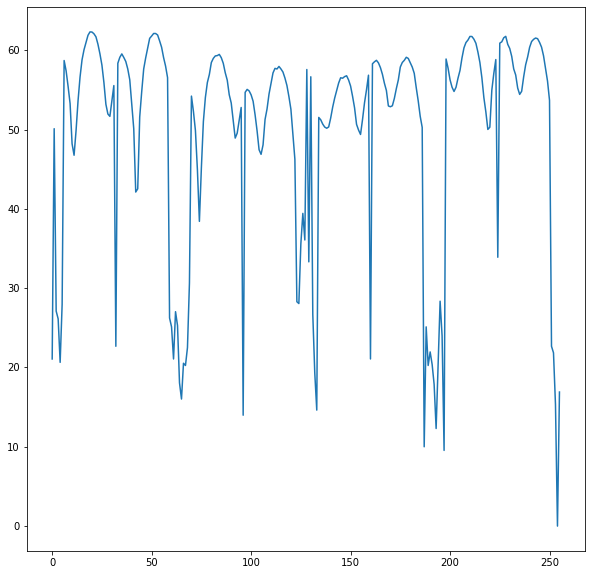

In [8]:
pd.DataFrame(lst[2].iloc[2]).plot.line(figsize=
[10,10], legend=False)

### Second method

In [9]:
csi_dict: {str: pd.DataFrame} = dict()
for filename in onlyfiles_pcap:
    csiFilePath = filename
    my_reader = get_reader(csiFilePath)
    csi_data = my_reader.read_file(csiFilePath, scaled=False)
    csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")
    csi_matrix = csi_matrix[:, :, 0, 0]
    csi_matrix = pd.DataFrame(csi_matrix)
    csi_dict[filename] = csi_matrix


In [10]:
csi_matrix

0          1          2          3          4          5    \
0    33.328423  50.107832  56.656532  57.380358  58.597368  59.301892   
1    19.294189  50.107832  18.061800  16.532125  19.493900  22.504200   
2    37.387806  50.107832  56.486615  57.124384  58.609755  59.224597   
3    17.242759  50.107832  13.010300  21.613680  26.522463  18.129134   
4    35.535189  50.107832  57.512113  57.815270  58.952241  59.553957   
..         ...        ...        ...        ...        ...        ...   
129  38.062478  50.107832  59.474661  59.640790  59.875733  59.849789   
130  20.969100  50.107832  23.692159  24.969296  22.855573  20.969100   
131  30.633334  50.107832  59.701278  59.732803  59.980871  59.997763   
132  22.671717  50.107832  16.901961  26.702459  18.633229  28.068580   
133  35.938397  50.107832  58.638253  58.642844  59.189399  59.488216   

           6          7          8          9    ...        246        247  \
0    59.262313  58.176024  56.122804  52.566817  ...  59.114884  58.423627   
1    55.277652  53.399381  50.465927  48.926566  ...  57.328439  55.554197   
2    59.076827  58.027368  55.808110  52.394121  ...  58.572903  58.197025   
3    55.901594  53.388329  51.531957  49.518473  ...  57.786273  55.614413   
4    59.767873  58.787802  56.412093  52.319841  ...  59.212671  58.440750   
..         ...        ...        ...        ...  ...        ...        ...   
129  59.091933  57.360473  54.222959  49.387698  ...  58.598975  57.452888   
130  55.969499  52.806990  48.819607  46.753475  ...  57.186428  54.649379   
131  59.158982  57.539697  54.269665  49.161380  ...  58.422728  56.942822   
132  55.591139  53.130231  48.796348  48.144940  ...  56.950410  54.653025   
133  59.113206  57.641739  54.741128  50.193822  ...  58.398864  57.456813   

           248        249        250        251        252        253  \
0    56.461684  52.651246  51.168534  54.507739  57.651751  59.317227   
1    53.411733  50.240791  47.578362  20.681859  27.853298  17.634280   
2    56.228624  52.030683  50.395133  54.454236  57.553084  59.291741   
3    53.383310  49.913014  48.460029  21.613680  22.278867  22.304489   
4    56.295645  53.514658  52.422059  55.083546  57.724933  59.678516   
..         ...        ...        ...        ...        ...        ...   
129  54.990737  50.190664  50.241982  54.982830  58.186145  59.842595   
130  50.804136  46.177969  44.612734  26.020600  28.603380  19.294189   
131  54.364886  50.442967  50.053350  55.082926  58.027306  59.890906   
132  51.812317  47.864391  48.329238  21.139434  21.846914  16.989700   
133  55.019092  49.825697  48.819835  54.625777  58.141097  59.929563   

           254        255  
0    60.037233  23.692159  
1    15.682017  20.043214  
2    59.944021  33.168088  
3    26.848454  21.958997  
4    60.493560  24.377506  
..         ...        ...  
129  60.666527  30.374265  
130  25.276299   3.010300  
131  60.621064  23.010300  
132  20.043214  17.242759  
133  60.640512  30.277572  

[134 rows x 256 columns]

<AxesSubplot:>

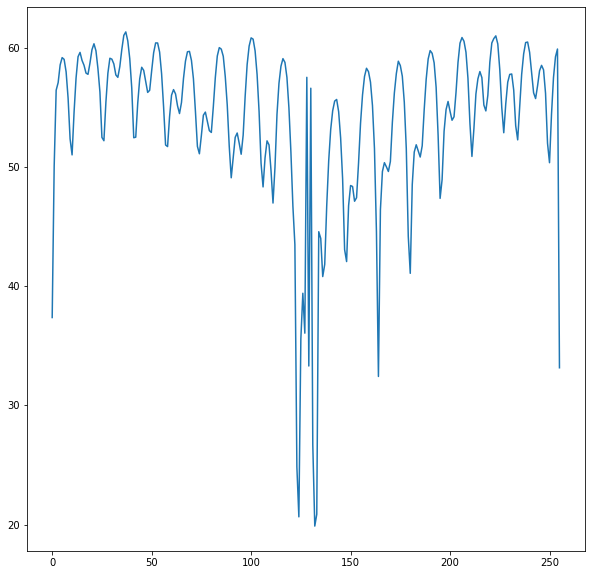

In [11]:
pd.DataFrame(csi_matrix.iloc[2]).plot.line(figsize=
[10,10], legend=False)